### Lab Part A

1. Generate N Gaussian random numbers and compute mean and std and plot histograms, for N=10,100,1000.  Compare the histograms for all three.  Now try 100k!  What do you notice? 

2. Load IRIS dataset and compute pairwise correlations between features.
    Hint: from scipy import stats
          stats.pearsonr(...)

3. Now standardize each feature and give scatter plot for pairs of columns with highest pairwise correlation. Also give scatter plot for the pair of columns with lowest pairwise correlation.


In [27]:
#Q:1
import random as rn
import numpy
import pandas as pd


In [35]:
#N=10
randomlist = []
for i in range(0,10):
    n = random.randint(0,10)
    randomlist.append(n)
    


In [36]:
df1 = pd.DataFrame(randomlist)
df1.mean()


0    4.6
dtype: float64

In [37]:
df1.std()

0    3.806427
dtype: float64

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

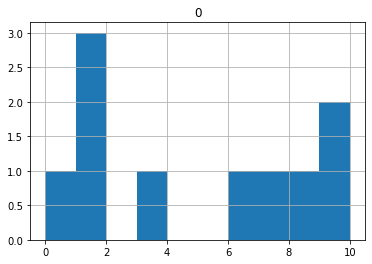

In [38]:
df1.hist()

In [39]:
#N=100
randomlist = []
for i in range(0,100):
    n = random.randint(0,100)
    randomlist.append(n)
    


In [40]:
df2 = pd.DataFrame(randomlist)
df2.mean()


0    48.0
dtype: float64

In [41]:
df2.std()

0    28.425341
dtype: float64

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

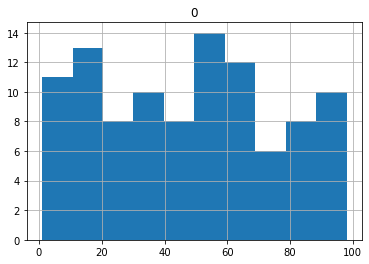

In [42]:
df2.hist()

In [45]:
#N=1000
randomlist = []
for i in range(0,1000):
    n = random.randint(0,1000)
    randomlist.append(n)
    


In [46]:
df3 = pd.DataFrame(randomlist)
df3.mean()

0    513.966
dtype: float64

In [47]:
df3.mean()

0    513.966
dtype: float64

In [48]:
df3.std()

0    292.36369
dtype: float64

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

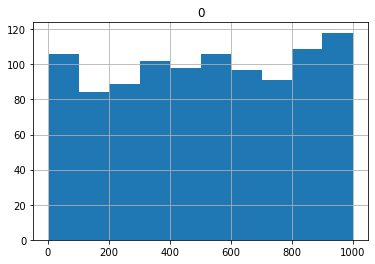

In [49]:
df3.hist()

In [52]:
#N=100,000
randomlist = []
for i in range(0,100000):
    n = random.randint(0,100000)
    randomlist.append(n)
    

In [53]:
df4 = pd.DataFrame(randomlist)
df4.mean()

0    50142.61872
dtype: float64

In [54]:
df4.mean()

0    50142.61872
dtype: float64

In [55]:
df4.std()

0    28836.703489
dtype: float64

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

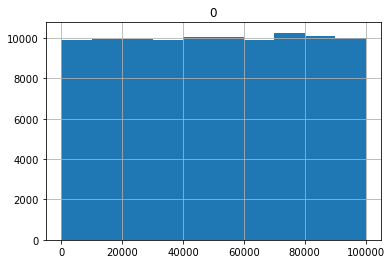

In [56]:
df4.hist()

In [65]:
#Q:2
import matplotlib as plt
import seaborn as sns
import plotly
from plotly import express as px  # This enables the HTML export to contain live chart data
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [75]:
dfiris = pd.read_csv(r'C:\Users\khalil\ML Lab 6\Iris.csv')
dfiris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [69]:
dfiris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [77]:
#Q:3
scaler = StandardScaler()
df = scaler.fit_transform(dfiris)

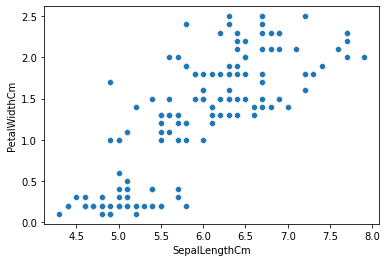

In [80]:
#High Correlation
sns.scatterplot(x="SepalLengthCm", y="PetalWidthCm", data=dfiris);

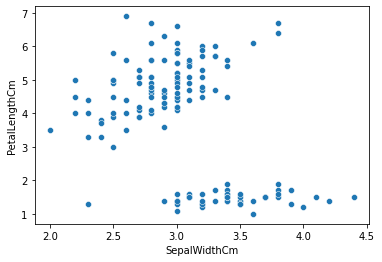

In [81]:
#Low Correlation
sns.scatterplot(x="SepalWidthCm", y="PetalLengthCm", data=dfiris);

### Lab Part B

1. Recall (and download) the UCI Adults Income dataset from HW2.
Find two examples in the course content in Canvas  
Database Details:   
user='new_haven_ds_read'  
password='new_haven_ds_secret_99'  
host='nhds-spring-23.cwroivw0q1rc.us-east-1.rds.amazonaws.com' database='nhds'  
database='nhds'  
  
  
 SQL: sql = 'select * from nhds.uci_adults'  
  
2. Calculate the mean, standard deviation, and variance of the age column in the dataset.
3. Create a histogram with bins of the age column.  Choose a number of bins that you like.
4. Calculate the mean, standard deviation, and variance of the educational_num column in the dataset.
5. Create a histogram with bins of the educational_num column.  Choose a number of bins that you like.

In [82]:
#Q:1
import postgresql

In [83]:
db = postgresql.open("pq://new_haven_ds_read:new_haven_ds_secret_99@nhds-spring-23.cwroivw0q1rc.us-east-1.rds.amazonaws.com/nhds")

In [84]:
sql = 'select * from nhds.uci_adults'


In [85]:
ps = db.prepare(sql)
res = ps()

In [86]:
type(res)

list

In [87]:
res

[(39,
  ' State-gov',
  77516,
  ' Bachelors',
  13,
  ' Never-married',
  ' Adm-clerical',
  ' Not-in-family',
  ' White',
  ' Male',
  2174,
  0,
  40,
  ' United-States',
  ' <=50K',
  1),
 (50,
  ' Self-emp-not-inc',
  83311,
  ' Bachelors',
  13,
  ' Married-civ-spouse',
  ' Exec-managerial',
  ' Husband',
  ' White',
  ' Male',
  0,
  0,
  13,
  ' United-States',
  ' <=50K',
  2),
 (38,
  ' Private',
  215646,
  ' HS-grad',
  9,
  ' Divorced',
  ' Handlers-cleaners',
  ' Not-in-family',
  ' White',
  ' Male',
  0,
  0,
  40,
  ' United-States',
  ' <=50K',
  3),
 (53,
  ' Private',
  234721,
  ' 11th',
  7,
  ' Married-civ-spouse',
  ' Handlers-cleaners',
  ' Husband',
  ' Black',
  ' Male',
  0,
  0,
  40,
  ' United-States',
  ' <=50K',
  4),
 (28,
  ' Private',
  338409,
  ' Bachelors',
  13,
  ' Married-civ-spouse',
  ' Prof-specialty',
  ' Wife',
  ' Black',
  ' Female',
  0,
  0,
  40,
  ' Cuba',
  ' <=50K',
  5),
 (37,
  ' Private',
  284582,
  ' Masters',
  14,
  ' Marrie

In [88]:
import pandas as pd

In [89]:
df = pd.DataFrame(res, columns=ps.column_names)
df.tail()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,id
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,32557
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,32558
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,32559
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,32560
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,32561


In [90]:
#Q:2
df.age.mean()

38.58164675532078

In [91]:
df.age.std()

13.640432553581146

In [92]:
df.age.var()

186.06140024879625

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

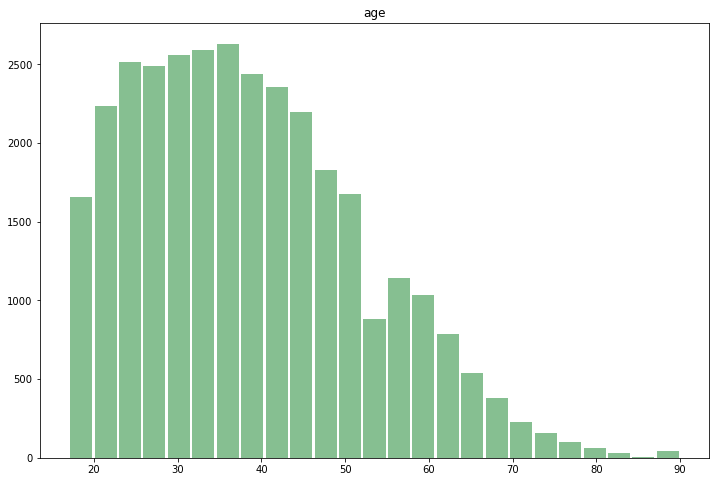

In [93]:
#Q:3
df.hist(column='age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


In [95]:
#Q:4
df.educational_num.mean()

10.0806793403151

In [96]:
df.educational_num.std()

2.5727203320673406

In [97]:
df.educational_num.var()

6.618889907032687

array([[<AxesSubplot:title={'center':'educational_num'}>]], dtype=object)

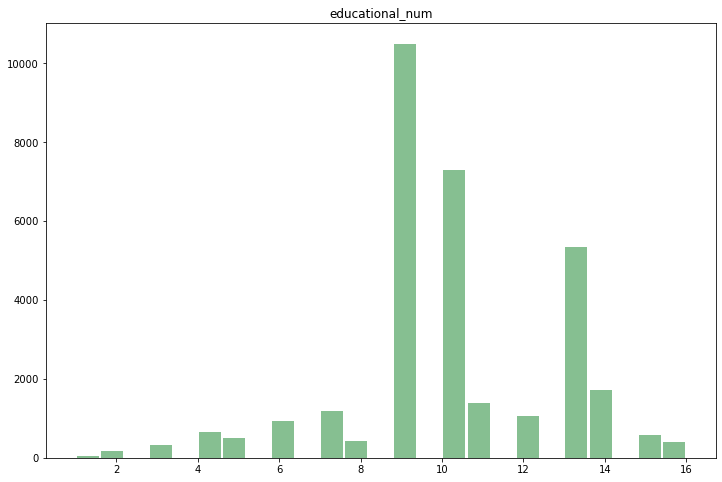

In [98]:
#Q:5
df.hist(column='educational_num', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


### Lab Part C
1. Create a DataFrame with the New York Times Covid data as done in the class notes  
2. Plot the number of daily cases in New Haven County.  
3. Add the rolling 7 day mean to your chart.  
4. Which day had the highest number of new cases in New Haven County?  
5. Which month had the highest number of total new cases in New Haven County?  

In [1]:
#Q:1
import pandas
import plotly
from plotly import express as px  # This enables the HTML export to contain live chart data
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
# NYT LIVE COVID DATA
#df = pandas.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', dtype={'fips':'string'})
df_20 = pandas.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2020.csv', dtype={'fips':'string'}).set_index('date')
df_21 = pandas.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2021.csv', dtype={'fips':'string'}).set_index('date')
df_22 = pandas.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2022.csv', dtype={'fips':'string'}).set_index('date')
df_23 = pandas.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2023.csv', dtype={'fips':'string'}).set_index('date')
df = pandas.concat([df_20, df_21, df_22, df_23]).reset_index()
df['date'] = pandas.to_datetime(df['date'])
df.tail()

,date,county,state,fips,cases,deaths
3430714,2023-02-22,Sweetwater,Wyoming,56037,12484,139.0
3430715,2023-02-22,Teton,Wyoming,56039,12123,16.0
3430716,2023-02-22,Uinta,Wyoming,56041,6378,43.0
3430717,2023-02-22,Washakie,Wyoming,56043,2748,50.0
3430718,2023-02-22,Weston,Wyoming,56045,1903,23.0


In [63]:
df['date'].max()

Timestamp('2023-02-22 00:00:00')

In [64]:
nhc = df[df['county'] == 'New Haven City']

In [5]:
# SOME FIPS DATA IN CASE WE NEED TO POPULATION WEIGHT SOME THINGS LATER
fips_df = pandas.read_json('https://raw.githubusercontent.com/Zoooook/CoronavirusTimelapse/master/static/population.json', dtype={'us_state_fips':'string', 'us_county_fips':'string'})
fips_df.tail()

,us_state_fips,us_county_fips,population,region,subregion,nyt_population
3138,56,56037,44117,Wyoming,Sweetwater,NaN
3139,56,56039,23059,Wyoming,Teton,NaN
3140,56,56041,20609,Wyoming,Uinta,NaN
3141,56,56043,8129,Wyoming,Washakie,NaN
3142,56,56045,7100,Wyoming,Weston,NaN


In [6]:
df = df.merge(fips_df, left_on='fips', right_on='us_county_fips')
df.tail()

,date,county,state,fips,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population
3309305,2023-02-18,Kalawao,Hawaii,15005,1,0.0,15,15005,75,Hawaii,Kalawao,NaN
3309306,2023-02-19,Kalawao,Hawaii,15005,1,0.0,15,15005,75,Hawaii,Kalawao,NaN
3309307,2023-02-20,Kalawao,Hawaii,15005,1,0.0,15,15005,75,Hawaii,Kalawao,NaN
3309308,2023-02-21,Kalawao,Hawaii,15005,1,0.0,15,15005,75,Hawaii,Kalawao,NaN
3309309,2023-02-22,Kalawao,Hawaii,15005,1,0.0,15,15005,75,Hawaii,Kalawao,NaN


In [65]:
nhc = df[(df['county'] == 'New Haven')  & (df['state'] == 'Connecticut')]
nhc['new_cases'] = nhc['cases'].diff()
nhc['new_cases_pop'] = nhc['new_cases'] / (nhc['population'] / 1000)


In [33]:
nhc.tail()

,date,county,state,fips,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population,new_cases,new_cases_pop
344068,2023-02-18,New Haven,Connecticut,09009,256859,3132.0,09,09009,859339,Connecticut,New Haven,NaN,0.0,0.000000
344069,2023-02-19,New Haven,Connecticut,09009,257015,3132.0,09,09009,859339,Connecticut,New Haven,NaN,156.0,0.181535
344070,2023-02-20,New Haven,Connecticut,09009,257036,3132.0,09,09009,859339,Connecticut,New Haven,NaN,21.0,0.024437
344071,2023-02-21,New Haven,Connecticut,09009,257067,3132.0,09,09009,859339,Connecticut,New Haven,NaN,31.0,0.036074
344072,2023-02-22,New Haven,Connecticut,09009,257121,3145.0,09,09009,859339,Connecticut,New Haven,NaN,54.0,0.062839


In [11]:
#Q:2 and 3
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fc['date'],
    y=fc['cases'],
    name='Cumulative Cases',
    visible='legendonly'
))
fig.add_trace(go.Bar(
    x=fc['date'],
    y=fc['new_cases'],
    name='Daily New Cases'
))
fig.add_trace(go.Scatter(
    x=fc['date'],
    y=fc['new_cases'].rolling(7).mean().round(2),
    name='Daily New Cases 7-DMA'
))
fig.update_layout(hovermode='x', title='New Haven County CT COVID Cases')
fig.show()

In [137]:
#Q:4
mvdf=nhc.sort_values(['new_cases'],ascending=False).groupby('new_cases')
mvdf.head()

,date,county,state,fips,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population,new_cases,new_cases_pop
343664,2022-01-10,New Haven,Connecticut,09009,159375,2403.0,09,09009,859339,Connecticut,New Haven,NaN,9788.0,11.390150
343657,2022-01-03,New Haven,Connecticut,09009,140745,2349.0,09,09009,859339,Connecticut,New Haven,NaN,7076.0,8.234236
343671,2022-01-17,New Haven,Connecticut,09009,171881,2469.0,09,09009,859339,Connecticut,New Haven,NaN,4301.0,5.005010
343650,2021-12-27,New Haven,Connecticut,09009,127993,2327.0,09,09009,859339,Connecticut,New Haven,NaN,3667.0,4.267233
343658,2022-01-04,New Haven,Connecticut,09009,143548,2371.0,09,09009,859339,Connecticut,New Haven,NaN,2803.0,3.261809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343201,2020-10-04,New Haven,Connecticut,09009,14583,1115.0,09,09009,859339,Connecticut,New Haven,NaN,0.0,0.000000
343907,2022-09-10,New Haven,Connecticut,09009,231869,2938.0,09,09009,859339,Connecticut,New Haven,NaN,0.0,0.000000
343200,2020-10-03,New Haven,Connecticut,09009,14583,1115.0,09,09009,859339,Connecticut,New Haven,NaN,0.0,0.000000
343154,2020-08-18,New Haven,Connecticut,09009,13376,1109.0,09,09009,859339,Connecticut,New Haven,NaN,-2.0,-0.002327


<AxesSubplot:xlabel='date'>

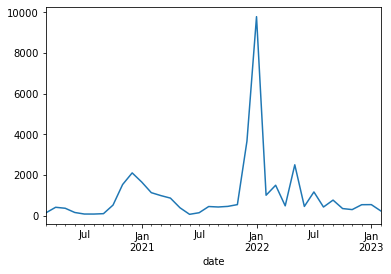

In [138]:
#Q:5
nhc.set_index('date').resample('MS')['new_cases'].max().plot()